## Chapter4

### 4.5 調整生存関数の解釈と利用

In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter, CoxPHFitter

In [2]:
DATADIR = '../datasets/'

In [3]:
ls $DATADIR

FRTCS.dat      actg320ncc.dat  cvdrisk.dat  uis.csv      whas500.dat
FRTCS.txt      actg320ncc.txt  cvdrisk.txt  uis.dat      whas500.txt
GRACE1000.dat  bpd.csv         gbcs.csv     uis.txt      whasncc.dat
GRACE1000.txt  bpd.dat         gbcs.dat     whas100.csv  whasncc.txt
actg320.csv    bpd.txt         gbcs.txt     whas100.dat
actg320.dat    comprisk.dat    recur.dat    whas100.txt
actg320.txt    comprisk.txt    recur.txt    whas500.csv


In [4]:
df = pd.read_csv(os.path.join(DATADIR, 'gbcs.csv'), encoding='shift-jis', index_col=0)

# 日→月に変換
df['survtime'] = df['survtime'] / 30
df['rectime'] = df['rectime'] / 30
# 何故か 0, 1 の変数が 1, 2 となっているので修正
df['hormone'] = df['hormone'] - 1

In [5]:
# Cox比例ハザードモデルによる回帰
df_1 = df.loc[:, ['rectime', 'hormone', 'censrec']]
cph = CoxPHFitter()
cph.fit(df_1, duration_col='rectime', event_col='censrec')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 686 total observations, 387 right-censored observations>
             duration col = 'rectime'
                event col = 'censrec'
      baseline estimation = breslow
   number of observations = 686
number of events observed = 299
   partial log-likelihood = -1783.69
         time fit was run = 2021-07-29 18:28:16 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
hormone    -0.36       0.69       0.13            -0.61            -0.12                 0.54                 0.89

              z      p   -log2(p)
covariate                        
hormone   -2.91 <0.005       8.12
---
Concordance = 0.54
Partial AIC = 3569.39
log-likelihood ratio test = 8.82 on 1 df
-log2(p) of ll-ratio test = 8.39

In [6]:
pd.set_option("max_rows", 10)

In [7]:
df_1.sort_values('rectime')

,rectime,hormone,censrec
id,,,
664,0.266667,0,0
568,0.500000,1,0
679,0.533333,0,0
220,0.566667,0,0
682,0.566667,0,0
...,...,...,...
34,85.033333,1,0
57,85.200000,1,0
9,85.433333,0,0


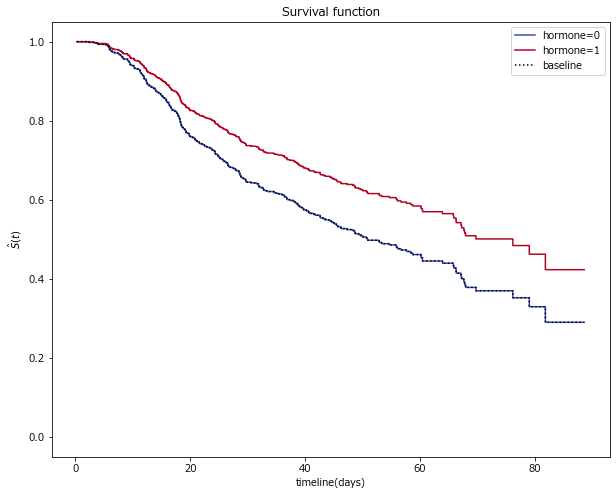

In [8]:
cph.plot_partial_effects_on_outcome(covariates='hormone', values=[0, 1], cmap='coolwarm', figsize=(10,8));
plt.ylim(-0.05, 1.05)
plt.xlabel('timeline(days)')
plt.ylabel('$\hat{S}(t)$')
plt.title('Survival function');

In [9]:
df_2 = df.loc[:, ['rectime', 'hormone', 'censrec', 'size']]
df_2

,rectime,hormone,censrec,size
id,,,,
1,44.566667,0,1,18
2,47.333333,0,1,20
3,42.633333,0,1,30
4,4.933333,0,0,24
5,62.100000,1,0,19
...,...,...,...,...
682,0.566667,0,0,50
683,28.566667,1,0,22
684,25.600000,0,0,60


In [10]:
cph = CoxPHFitter()
cph.fit(df_2, duration_col='rectime', event_col='censrec')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 686 total observations, 387 right-censored observations>
             duration col = 'rectime'
                event col = 'censrec'
      baseline estimation = breslow
   number of observations = 686
number of events observed = 299
   partial log-likelihood = -1775.62
         time fit was run = 2021-07-29 18:28:17 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
hormone    -0.37       0.69       0.13            -0.62            -0.13                 0.54                 0.88
size        0.02       1.02       0.00             0.01             0.02                 1.01                 1.02

              z      p   -log2(p)
covariate                        
hormone   -2.98 <0.005       8.46
size       4.28 <0.005      15.71
---
Concordance = 0.58
Partial AIC = 3555.25
log-likelihood ratio test = 24.96 on 2 df
-log2(p) of ll-ratio test = 18.01

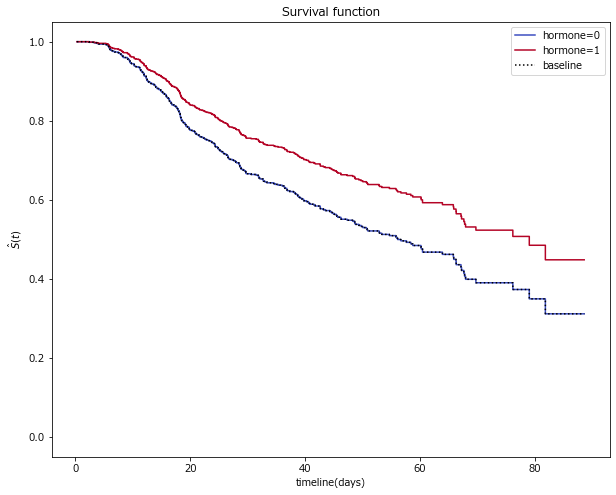

In [11]:
cph.plot_partial_effects_on_outcome(covariates='hormone', values=[0, 1], cmap='coolwarm', figsize=(10,8))
plt.ylim(-0.05, 1.05)
plt.xlabel('timeline(days)')
plt.ylabel('$\hat{S}(t)$')
plt.title('Survival function');

In [12]:
# 各変数が中心化される実装になっているため、中心化して渡しても結果は変わらない
df_2_centered = df_2.copy()
df_2_centered['size'] = df_2_centered['size'] - 100
df_2_centered = df_2_centered.rename({'size': 'size_c'}, axis=1)

# Cox比例ハザードモデルによる回帰
cph = CoxPHFitter()
cph.fit(df_2_centered, duration_col='rectime', event_col='censrec')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 686 total observations, 387 right-censored observations>
             duration col = 'rectime'
                event col = 'censrec'
      baseline estimation = breslow
   number of observations = 686
number of events observed = 299
   partial log-likelihood = -1775.62
         time fit was run = 2021-07-29 18:28:17 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
hormone    -0.37       0.69       0.13            -0.62            -0.13                 0.54                 0.88
size_c      0.02       1.02       0.00             0.01             0.02                 1.01                 1.02

              z      p   -log2(p)
covariate                        
hormone   -2.98 <0.005       8.46
size_c     4.28 <0.005      15.71
---
Concordance = 0.58
Partial AIC = 3555.25
log-likelihood ratio test = 24.96 on 2 df
-log2(p) of ll-ratio test = 18.01

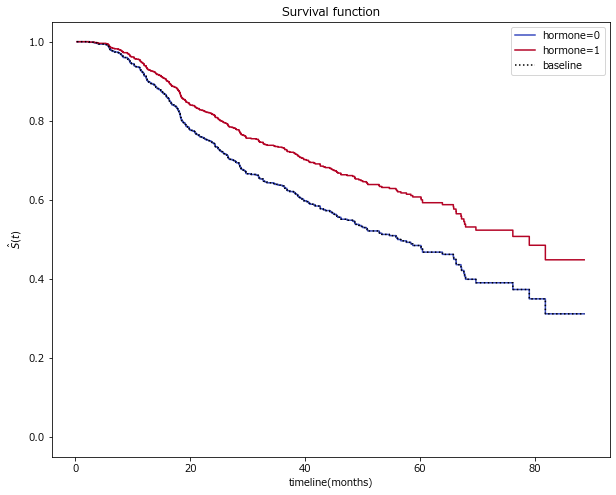

In [13]:
cph.plot_partial_effects_on_outcome(covariates='hormone', values=[0, 1], cmap='coolwarm', figsize=(10,8))
plt.ylim(-0.05, 1.05)
plt.xlabel('timeline(months)')
plt.ylabel('$\hat{S}(t)$')
plt.title('Survival function');

In [14]:
pd.set_option("max_rows", 1000)

In [15]:
df['prog_recp'].replace({0: 1})

id
1       141
2        78
3       422
4        25
5        19
6       356
7         6
8         6
9        22
10      462
11       74
12       24
13       31
14       45
15      135
16       32
17        7
18        1
19       84
20       14
21       77
22      111
23        7
24        7
25       64
26      109
27       25
28        1
29      227
30        6
31        1
32        1
33        1
34       26
35       41
36       96
37       18
38       24
39        1
40      167
41        1
42        1
43        1
44        1
45        1
46        1
47        6
48      366
49       21
50      279
51      739
52       10
53       27
54       28
55       13
56        1
57      195
58       77
59        1
60        1
61      223
62      270
63      282
64       48
65       56
66      102
67       11
68       73
69       64
70      264
71       22
72      154
73      206
74        2
75       46
76      110
77        1
78      178
79      130
80      132
81      340
82        6
83        4
8

In [16]:
df_3 = df.loc[:, ['rectime', 'hormone', 'censrec', 'size', 'grade', 'prog_recp']]
df_3['ln_prg'] = df_3['prog_recp'].apply(lambda x: np.log(x) if x>0 else 0)
df_3['grade_2'] = (df_3['grade'] == 2).astype(int)
df_3['grade_3'] = (df_3['grade'] == 3).astype(int)
del df_3['prog_recp']
del df_3['grade']
cph = CoxPHFitter()
cph.fit(df_3, duration_col='rectime', event_col='censrec')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 686 total observations, 387 right-censored observations>
             duration col = 'rectime'
                event col = 'censrec'
      baseline estimation = breslow
   number of observations = 686
number of events observed = 299
   partial log-likelihood = -1749.15
         time fit was run = 2021-07-29 18:28:17 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
hormone    -0.33       0.72       0.13            -0.58            -0.08                 0.56                 0.92
size        0.01       1.01       0.00             0.01             0.02                 1.01                 1.02
ln_prg     -0.17       0.84       0.03            -0.23            -0.11                 0.79                 0.89
grade_2     0.63       1.87       0.25             0.13             1.12                 1.14                 3.06
grade_3     0.63       1.88       0.28             0.09             1.17                 1.09                 3.23

              z      p   -log2(p)
covariate                        
hormone   -2.63   0.01       6.86
size       3.72 <0.005      12.30
ln_prg    -5.69 <0.005      26.24
grade_2    2.50   0.01       6.32
grade_3    2.29   0.02       5.49
---
Concordance = 0.67
Partial AIC = 3508.30
log-likelihood ratio test = 77.91 on 5 df
-log2(p) of ll-ratio test = 48.63

In [17]:
cph.summary

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,z,p,-log2(p)
covariate,,,,,,,,,,
hormone,-0.331169,0.718083,0.126107,-0.578334,-0.084005,0.560832,0.919426,-2.626109,8.636716e-03,6.855302
size,0.013565,1.013657,0.003646,0.006419,0.020710,1.006440,1.020926,3.720759,1.986251e-04,12.297664
ln_prg,-0.173922,0.840363,0.030558,-0.233814,-0.114029,0.791509,0.892232,-5.691507,1.259230e-08,26.242883
grade_2,0.626019,1.870150,0.250799,0.134462,1.117576,1.143921,3.057433,2.496098,1.255679e-02,6.315389
grade_3,0.630779,1.879074,0.275888,0.090048,1.171510,1.094227,3.226862,2.286358,2.223333e-02,5.491132


In [18]:
df_3.iloc[:, [1, 3, 4, 5, 6]]

,hormone,size,ln_prg,grade_2,grade_3
id,,,,,
1,0,18,4.948760,0,1
2,0,20,4.356709,0,0
3,0,30,6.045005,1,0
4,0,24,3.218876,0,0
5,1,19,2.944439,1,0
6,1,56,5.874931,0,0
7,0,52,1.791759,1,0
8,1,22,1.791759,1,0
9,0,30,3.091042,1,0


In [19]:
df_3['risk_score'] = cph.summary['coef'] @ df_3.iloc[:, [1, 3, 4, 5, 6]].values.T

In [20]:
df_4 = df_3.loc[:, ['rectime', 'risk_score', 'censrec']]
cph = CoxPHFitter()
cph.fit(df_4, duration_col='rectime', event_col='censrec')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 686 total observations, 387 right-censored observations>
             duration col = 'rectime'
                event col = 'censrec'
      baseline estimation = breslow
   number of observations = 686
number of events observed = 299
   partial log-likelihood = -1749.15
         time fit was run = 2021-07-29 18:28:18 UTC

---
             coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                          
risk_score   1.00       2.72       0.11             0.78             1.22                 2.17                 3.40

              z      p   -log2(p)
covariate                        
risk_score 8.76 <0.005      58.89
---
Concordance = 0.67
Partial AIC = 3500.30
log-likelihood ratio test = 77.91 on 1 df
-log2(p) of ll-ratio test = 59.68

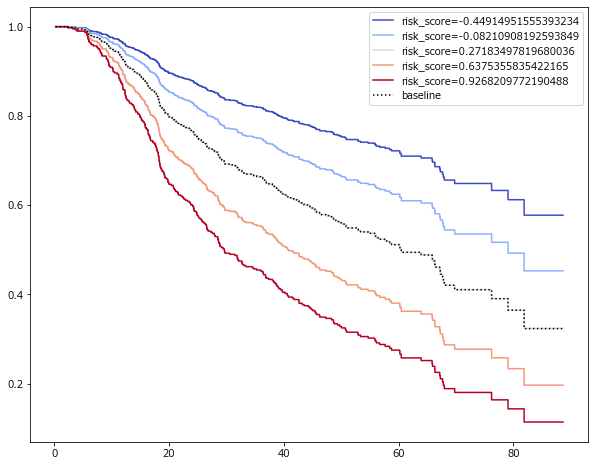

In [21]:
cph.plot_partial_effects_on_outcome(covariates='risk_score', values=df_3['risk_score'].quantile([.1, .25, .5, .75, .9]).to_list(), cmap='coolwarm', figsize=(10,8));

In [22]:
df_3 = df.loc[:, ['rectime', 'hormone', 'censrec', 'size', 'grade', 'prog_recp']]
df_3['ln_prg'] = df_3['prog_recp'].apply(lambda x: np.log(x) if x>0 else 0)
df_3['grade_2'] = (df_3['grade'] == 2).astype(int)
df_3['grade_3'] = (df_3['grade'] == 3).astype(int)
del df_3['prog_recp']
del df_3['grade']
cph = CoxPHFitter()
cph.fit(df_3, duration_col='rectime', event_col='censrec')
cph.print_summary()
df_3['risk_score_mod'] = cph.summary['coef'][1:] @ df_3.iloc[:, [3, 4, 5, 6]].values.T

<lifelines.CoxPHFitter: fitted with 686 total observations, 387 right-censored observations>
             duration col = 'rectime'
                event col = 'censrec'
      baseline estimation = breslow
   number of observations = 686
number of events observed = 299
   partial log-likelihood = -1749.15
         time fit was run = 2021-07-29 18:28:18 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
hormone    -0.33       0.72       0.13            -0.58            -0.08                 0.56                 0.92
size        0.01       1.01       0.00             0.01             0.02                 1.01                 1.02
ln_prg     -0.17       0.84       0.03            -0.23            -0.11                 0.79                 0.89
grade_2     0.63       1.87       0.25             0.13             1.12                 1.14                 3.06
grade_3     0.63       1.88       0.28             0.09             1.17                 1.09                 3.23

              z      p   -log2(p)
covariate                        
hormone   -2.63   0.01       6.86
size       3.72 <0.005      12.30
ln_prg    -5.69 <0.005      26.24
grade_2    2.50   0.01       6.32
grade_3    2.29   0.02       5.49
---
Concordance = 0.67
Partial AIC = 3508.30
log-likelihood ratio test = 77.91 on 5 df
-log2(p) of ll-ratio test = 48.63

In [23]:
df_3['risk_score_mod'].quantile(.5)

0.3718683095933743